In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data loading

data = pd.read_csv("../data/synthetic_fb_ads_undergarments.csv")

df = data.copy()

df.head()

,campaign_name,adset_name,date,spend,impressions,clicks,ctr,purchases,revenue,roas,creative_type,creative_message,audience_type,platform,country
0,Men ComfortMax Launch,Adset-1 Retarget,2025-01-01,640.09,235597,4313.0,0.0183,80,1514.28,2.37,Image,Breathable organic cotton that moves with you ...,Broad,Facebook,US
1,Men ComfortMax Launch,Adset-1 Retarget,2025-01-02,373.75,276194,5429.0,0.0197,94,4152.81,11.11,Video,No ride‑up guarantee — best‑selling men briefs...,Broad,Facebook,US
2,Men ComfortMax Launch,Adset-1 Retarget,2025-01-03,703.79,466572,9830.0,0.0211,240,4893.43,6.95,UGC,Cooling mesh panels for workouts — men boxers ...,Broad,Facebook,US
3,Men_ComfortMax_Launch,Adset-1 Retarget,2025-01-04,441.50,193230,2424.0,0.0125,61,1330.10,3.01,Image,Cooling mesh panels for workouts — men athleti...,Lookalike,Facebook,US
4,Men ComfortMax Launch,Adset-1 Retarget,2025-01-05,NaN,404300,6372.0,0.0158,181,7027.20,51.52,Video,Summer‑ready essentials — sweat‑wicking men at...,Lookalike,Instagram,IN


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   campaign_name     4500 non-null   object 
 1   adset_name        4500 non-null   object 
 2   date              4500 non-null   object 
 3   spend             4387 non-null   float64
 4   impressions       4500 non-null   int64  
 5   clicks            4348 non-null   float64
 6   ctr               4500 non-null   float64
 7   purchases         4500 non-null   int64  
 8   revenue           4367 non-null   float64
 9   roas              4491 non-null   float64
 10  creative_type     4500 non-null   object 
 11  creative_message  4500 non-null   object 
 12  audience_type     4500 non-null   object 
 13  platform          4500 non-null   object 
 14  country           4500 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 527.5+ KB


,spend,impressions,clicks,ctr,purchases,revenue,roas
count,4387.000000,4500.000000,4348.000000,4500.000000,4500.000000,4367.000000,4491.000000
mean,479.958947,264497.002889,3466.252070,0.013066,75.809778,2808.724690,9.634400
std,283.392088,145930.508077,2471.919961,0.005101,77.935337,2837.959721,16.452217
min,21.140000,12002.000000,71.000000,0.003000,0.000000,0.000000,0.000000
25%,249.240000,137623.250000,1573.750000,0.009400,22.000000,837.930000,1.930000
50%,439.060000,263456.500000,2986.500000,0.012100,52.000000,1943.260000,4.340000
75%,676.570000,390130.500000,4803.500000,0.015900,103.000000,3772.715000,10.435000
max,1482.760000,519901.000000,15738.000000,0.036400,644.000000,28284.690000,286.050000


In [4]:
df.isnull().sum()

campaign_name         0
adset_name            0
date                  0
spend               113
impressions           0
clicks              152
ctr                   0
purchases             0
revenue             133
roas                  9
creative_type         0
creative_message      0
audience_type         0
platform              0
country               0
dtype: int64

In [5]:
#recalculating CTR and ROAS
df['calculated_ctr'] = df['clicks'] / df['impressions']
df['calculated_roas'] = df['revenue'] / df['spend']

#comparing existing vs calculated
df[['ctr', 'calculated_ctr', 'roas', 'calculated_roas']].head()

,ctr,calculated_ctr,roas,calculated_roas
0,0.0183,0.018307,2.37,2.365730
1,0.0197,0.019656,11.11,11.111197
2,0.0211,0.021069,6.95,6.952969
3,0.0125,0.012545,3.01,3.012684
4,0.0158,0.015761,51.52,NaN


In [6]:
#filling the null values using formulae

#  Fill Revenue using ROAS * Spend ===
mask = df['revenue'].isna() & df['roas'].notna() & df['spend'].notna()
df.loc[mask, 'revenue'] = df['roas'] * df['spend']

# Fill ROAS using Revenue / Spend ===
mask = df['roas'].isna() & df['revenue'].notna() & df['spend'].notna()
df.loc[mask, 'roas'] = df['revenue'] / df['spend']

# Fill Spend using Revenue / ROAS ===
mask = df['spend'].isna() & df['revenue'].notna() & df['roas'].notna()
df.loc[mask, 'spend'] = df['revenue'] / df['roas']

# Fill CTR using Clicks / Impressions ===
mask = df['ctr'].isna() & df['clicks'].notna() & df['impressions'].notna()
df.loc[mask, 'ctr'] = df['clicks'] / df['impressions']

#  Fill Clicks using CTR * Impressions ===
mask = df['clicks'].isna() & df['ctr'].notna() & df['impressions'].notna()
df.loc[mask, 'clicks'] = df['ctr'] * df['impressions']

#  Fill Impressions using Clicks / CTR ===
mask = df['impressions'].isna() & df['clicks'].notna() & df['ctr'].notna()
df.loc[mask, 'impressions'] = df['clicks'] / df['ctr']

# Final: Check remaining missing values ===
df.isna().sum()

campaign_name         0
adset_name            0
date                  0
spend                11
impressions           0
clicks                0
ctr                   0
purchases             0
revenue               2
roas                  9
creative_type         0
creative_message      0
audience_type         0
platform              0
country               0
calculated_ctr      152
calculated_roas     244
dtype: int64

In [7]:

df[df['spend'].isna()]


,campaign_name,adset_name,date,spend,impressions,clicks,ctr,purchases,revenue,roas,creative_type,creative_message,audience_type,platform,country,calculated_ctr,calculated_roas
113,Men ComfortMax Launch,Adset-2 LAL2,2025-01-24,NaN,57420,651.0,0.0113,0,656.68,NaN,Video,"Ultra‑soft waistband, no marks — premium men a...",Retargeting,Instagram,UK,0.011338,NaN
190,Men_ComfortMax_Launch,Adset-3 ATC,2025-01-11,NaN,45859,580.0,0.0127,0,445.62,NaN,UGC,"All‑day comfort, zero pinch — try our men trunks!",Broad,Instagram,US,0.012647,NaN
360,Men Comfortmax Launch,Adset-5 Retarget,2025-01-01,NaN,308526,5493.0,0.0178,0,5952.16,NaN,Image,Summer‑ready essentials — sweat‑wicking men in...,Lookalike,Facebook,IN,0.017804,NaN
523,WOMEN Seamless Everyday,Adset-1 LAL1,2025-03-15,NaN,47832,451.0,0.0094,0,322.44,NaN,Image,Doctors recommend breathable organic cotton — ...,Lookalike,Facebook,UK,0.009429,NaN
649,WOMEN SEAMLESS EVERYDAY,Adset-3 Broad,2025-01-20,NaN,220852,2281.0,0.0103,76,NaN,13.46,Image,Doctors recommend breathable modal — meet our ...,Retargeting,Facebook,IN,0.010328,NaN
735,women seamless everyday,Adset-4 WC,2025-01-16,NaN,404311,3484.0,0.0086,0,4693.50,NaN,Image,"Ultra‑soft waistband, no marks — premium women...",Retargeting,Facebook,UK,0.008617,NaN
895,WOMEN Seamless Everyday,Adset-5 LAL1,2025-03-27,NaN,197327,1551.0,0.0079,0,1396.47,NaN,Image,"Wire‑free ease, cloud‑soft cups — women pantie...",Lookalike,Facebook,UK,0.007860,NaN
2179,MEN Signature Soft,Adset-5 WC,2025-01-20,NaN,249510,3674.0,0.0147,20,NaN,0.50,Video,Breathable modal that moves with you — limited...,Lookalike,Facebook,UK,0.014725,NaN
2351,WOMEN FIT & LIFT,Adset-2 Broad,2025-01-12,NaN,58037,1710.0,0.0295,0,486.59,NaN,Video,"Wire‑free ease, cloud‑soft cups — women pantie...",Lookalike,Facebook,US,0.029464,NaN
2589,Women_Fit_&_Lift,Adset-4 ATC,2025-03-11,NaN,417528,5238.0,0.0125,0,2579.99,NaN,Carousel,Doctors recommend breathable cotton — meet our...,Lookalike,Facebook,UK,0.012545,NaN


In [8]:

df[df['revenue'].isna()]

,campaign_name,adset_name,date,spend,impressions,clicks,ctr,purchases,revenue,roas,creative_type,creative_message,audience_type,platform,country,calculated_ctr,calculated_roas
649,WOMEN SEAMLESS EVERYDAY,Adset-3 Broad,2025-01-20,NaN,220852,2281.0,0.0103,76,NaN,13.46,Image,Doctors recommend breathable modal — meet our ...,Retargeting,Facebook,IN,0.010328,NaN
2179,MEN Signature Soft,Adset-5 WC,2025-01-20,NaN,249510,3674.0,0.0147,20,NaN,0.50,Video,Breathable modal that moves with you — limited...,Lookalike,Facebook,UK,0.014725,NaN


In [9]:

df[df['roas'].isna()]

,campaign_name,adset_name,date,spend,impressions,clicks,ctr,purchases,revenue,roas,creative_type,creative_message,audience_type,platform,country,calculated_ctr,calculated_roas
113,Men ComfortMax Launch,Adset-2 LAL2,2025-01-24,NaN,57420,651.0,0.0113,0,656.68,NaN,Video,"Ultra‑soft waistband, no marks — premium men a...",Retargeting,Instagram,UK,0.011338,NaN
190,Men_ComfortMax_Launch,Adset-3 ATC,2025-01-11,NaN,45859,580.0,0.0127,0,445.62,NaN,UGC,"All‑day comfort, zero pinch — try our men trunks!",Broad,Instagram,US,0.012647,NaN
360,Men Comfortmax Launch,Adset-5 Retarget,2025-01-01,NaN,308526,5493.0,0.0178,0,5952.16,NaN,Image,Summer‑ready essentials — sweat‑wicking men in...,Lookalike,Facebook,IN,0.017804,NaN
523,WOMEN Seamless Everyday,Adset-1 LAL1,2025-03-15,NaN,47832,451.0,0.0094,0,322.44,NaN,Image,Doctors recommend breathable organic cotton — ...,Lookalike,Facebook,UK,0.009429,NaN
735,women seamless everyday,Adset-4 WC,2025-01-16,NaN,404311,3484.0,0.0086,0,4693.50,NaN,Image,"Ultra‑soft waistband, no marks — premium women...",Retargeting,Facebook,UK,0.008617,NaN
895,WOMEN Seamless Everyday,Adset-5 LAL1,2025-03-27,NaN,197327,1551.0,0.0079,0,1396.47,NaN,Image,"Wire‑free ease, cloud‑soft cups — women pantie...",Lookalike,Facebook,UK,0.007860,NaN
2351,WOMEN FIT & LIFT,Adset-2 Broad,2025-01-12,NaN,58037,1710.0,0.0295,0,486.59,NaN,Video,"Wire‑free ease, cloud‑soft cups — women pantie...",Lookalike,Facebook,US,0.029464,NaN
2589,Women_Fit_&_Lift,Adset-4 ATC,2025-03-11,NaN,417528,5238.0,0.0125,0,2579.99,NaN,Carousel,Doctors recommend breathable cotton — meet our...,Lookalike,Facebook,UK,0.012545,NaN
4259,Women-Studio Sports,Adset-3 LAL2,2025-01-30,NaN,266100,2948.0,0.0111,0,6100.90,NaN,Video,Summer‑ready essentials — sweat‑wicking women ...,Retargeting,Instagram,US,0.011079,NaN


In [10]:
#dropping the rest null values
print("Before dropping:", df.shape)
df = df.dropna(subset=['spend', 'revenue', 'roas'], how='any').reset_index(drop=True)
print("After dropping:", df.shape)


Before dropping: (4500, 17)
After dropping: (4489, 17)


In [11]:
# Final-Check remaining missing values

df.isna().sum()

campaign_name         0
adset_name            0
date                  0
spend                 0
impressions           0
clicks                0
ctr                   0
purchases             0
revenue               0
roas                  0
creative_type         0
creative_message      0
audience_type         0
platform              0
country               0
calculated_ctr      152
calculated_roas     233
dtype: int64

In [12]:
df = df.drop(columns=['calculated_ctr', 'calculated_roas'], errors='ignore')


In [13]:
df.shape

(4489, 15)

In [14]:
#saving the cleaned data (without null value)
df.to_csv("../data/cleaned_data.csv", index=False)

In [15]:
df['date'] = pd.to_datetime(df['date'])
campaign_trends = df.groupby(['campaign_name', 'date'])['roas'].mean().reset_index()

# Find campaigns with biggest ROAS drop
roas_change = campaign_trends.groupby('campaign_name').agg(
    start_roas=('roas', 'first'),
    end_roas=('roas', 'last')
)
roas_change['pct_drop'] = (roas_change['start_roas'] - roas_change['end_roas']) / roas_change['start_roas']
roas_change.sort_values('pct_drop', ascending=False).head(5)



,start_roas,end_roas,pct_drop
campaign_name,,,
Women Cotton Classics,85.550000,0.000,1.000000
WOMEN | STUDIO SPORTS,113.460000,4.685,0.958708
MEN Sign-ture Soft,17.090000,0.790,0.953774
MEN_Signature_Soft,3.186667,0.210,0.934100
Men Bold Colors Drop,2.720000,0.200,0.926471


In [16]:
top_spend = df.groupby('campaign_name')['spend'].sum().sort_values(ascending=False).head(5)
top_roas = df.groupby('campaign_name')['roas'].mean().sort_values(ascending=False).head(5)
top_revenue = df.groupby('campaign_name')['revenue'].sum().sort_values(ascending=False).head(5)

top_spends_table = pd.DataFrame(top_spend).reset_index()
top_roas_table = pd.DataFrame(top_roas).reset_index()
top_revenue_table = pd.DataFrame(top_revenue).reset_index()

print("Top 5 Campaigns by Spend:")
print(top_spends_table)
print("\nTop 5 Campaigns by ROAS:")
print(top_roas_table)
print("\nTop 5 Campaigns by Revenue:")
print(top_revenue_table)

Top 5 Campaigns by Spend:
             campaign_name          spend
0        Men Premium Modal  103107.845718
1     Men Bold Colors Drop   98655.347023
2       MEN Signature Soft   81441.533600
3   women Summer Invisible   76789.394745
4  WOMEN Seamless Everyday   75198.668630

Top 5 Campaigns by ROAS:
              campaign_name   roas
0         MEN PREMIUM -ODAL  89.33
1  Men | Athlei ure Cooling  85.33
2     women | studio sp-rts  76.37
3       Women-Studio-Sports  41.07
4   women seam-ess everyday  38.71

Top 5 Campaigns by Revenue:
              campaign_name      revenue
0  Men | Athleisure Cooling  828486.7016
1     Women | Studio Sports  646325.4809
2         Men Premium Modal  552531.3473
3     WOMEN Cotton Classics  547901.8148
4     Men ComfortMax Launch  463259.8573


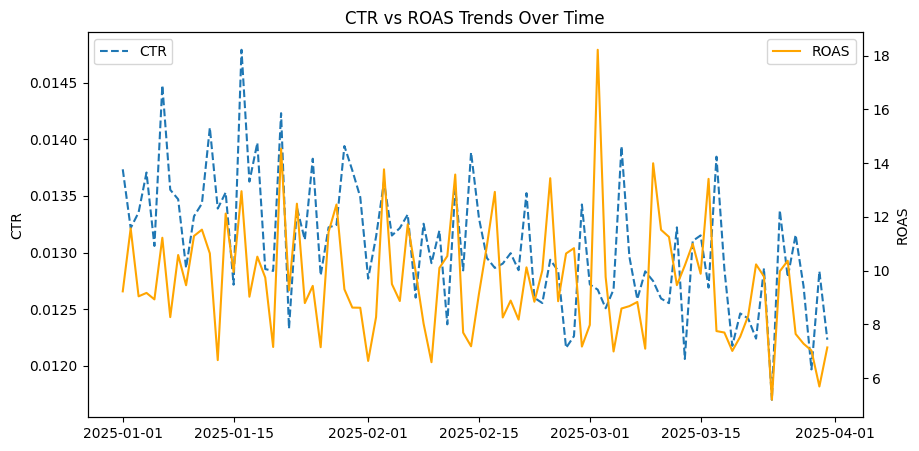

In [17]:
fig, ax1 = plt.subplots(figsize=(10,5))
df['date'] = pd.to_datetime(df['date'])

daily_trends = df.groupby('date')[['ctr', 'roas']].mean()


ax2 = ax1.twinx()

ax1.plot(daily_trends.index, daily_trends['ctr'], label='CTR', linestyle='--')
ax2.plot(daily_trends.index, daily_trends['roas'], label='ROAS', color='orange')

ax1.set_ylabel('CTR')
ax2.set_ylabel('ROAS')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("CTR vs ROAS Trends Over Time")
plt.show()